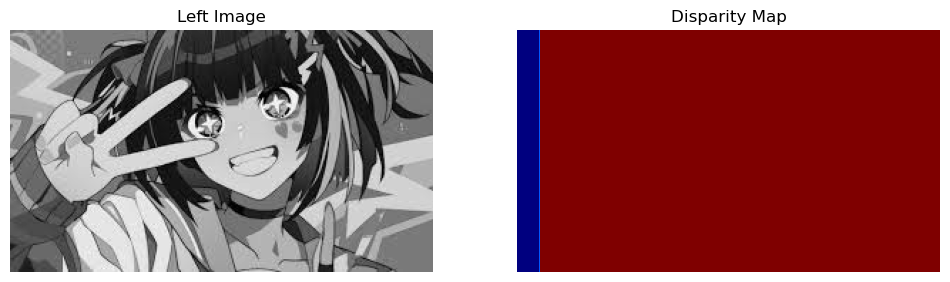

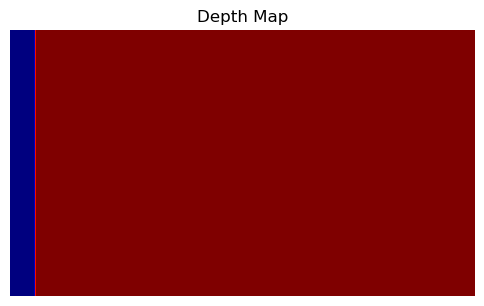

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the left and right images for stereo vision
img_left = cv2.imread('lab_6_model.jpeg', cv2.IMREAD_GRAYSCALE)  # Replace with your left image path
img_right = cv2.imread('lab_6_model.jpeg', cv2.IMREAD_GRAYSCALE)  # Replace with your right image path

# Check if images are loaded
if img_left is None or img_right is None:
    print("Error: Images not found!")
    exit()

# Step 1: Stereo Rectification (Optional, required if images are not aligned)
# This step ensures that the images are aligned properly to get accurate disparity results.
# In real-world use, you would need to calibrate the stereo cameras using chessboard patterns.

# For simplicity, we are skipping camera calibration here and will directly calculate disparity.
# You can calibrate the stereo cameras and use the `cv2.stereoCalibrate` function for better results.

# Step 2: Create StereoSGBM and calculate the disparity map
# StereoSGBM (Semi Global Block Matching) is a popular algorithm for disparity map calculation

stereo = cv2.StereoSGBM_create(minDisparity=0, numDisparities=16, blockSize=15,
                               P1=8 * 3 * 15 ** 2, P2=32 * 3 * 15 ** 2,
                               preFilterCap=63, uniquenessRatio=15, speckleWindowSize=50,
                               speckleRange=32, disp12MaxDiff=1)

# Calculate disparity map
disparity = stereo.compute(img_left, img_right).astype(np.float32) / 16.0

# Step 3: Normalize the disparity map for visualization
# We need to normalize the disparity map to show it as a grayscale image
disp_normalized = cv2.normalize(disparity, None, 0, 255, cv2.NORM_MINMAX)
disp_normalized = np.uint8(disp_normalized)

# Display the disparity map
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(img_left, cmap='gray')
plt.title('Left Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(disp_normalized, cmap='jet')
plt.title('Disparity Map')
plt.axis('off')

plt.show()

# Step 4: Convert disparity map to depth map using the formula
# Depth = (Focal Length * Baseline) / Disparity
# In the formula, Focal Length (f) and Baseline (B) are intrinsic and extrinsic parameters of the camera.
# You should calibrate your stereo camera system to obtain these parameters.

# Assuming baseline and focal length (example values, you need to replace these with actual values)
baseline = 0.1  # in meters (distance between the two cameras)
focal_length = 500  # in pixels (you can calibrate to get this)

# To avoid division by zero, replace 0 disparities with a large number
disparity[disparity == 0] = 0.1

# Compute depth map (in meters)
depth_map = (focal_length * baseline) / disparity

# Step 5: Display the depth map
# Normalize depth map for better visualization (we scale to show in a visible range)
depth_map_normalized = cv2.normalize(depth_map, None, 0, 255, cv2.NORM_MINMAX)
depth_map_normalized = np.uint8(depth_map_normalized)

plt.figure(figsize=(6, 6))
plt.imshow(depth_map_normalized, cmap='jet')
plt.title('Depth Map')
plt.axis('off')
plt.show()
